# Business Case - Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people!

In [1]:
# importing libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set color palette and style
sns.set_palette('pastel')
sns.set_style('whitegrid')

# Importing data and Analyzing Basic Metrics

In [3]:
df_aerofit = pd.read_csv('../aerofit_treadmill.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df_aerofit.shape

(180, 9)

In [5]:
df_aerofit.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
df_aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df_aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Data Pre-processing

In [8]:
df = df_aerofit.copy()

In [9]:
# Binning age group
bins = [17, 25, 30, 40, 50]
labels = ['18-25', '25-30', '30-40', '40-50']
df['Age_Group'] = pd.cut(x = df['Age'], bins = bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,KP281,18,Male,14,Single,3,4,29562,112,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,18-25
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25
3,KP281,19,Male,12,Single,3,3,32973,85,18-25
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25


In [10]:
# Binning Income
bins = [25000, 50000, 75000, 100000, 150000]
labels = ['25000-50000', '50000-75000', '75000-10000', '100000+']
df['Income_Group'] = pd.cut(x = df['Income'], bins = bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,25000-50000
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,25000-50000
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,25000-50000
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,25000-50000
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,25000-50000


In [11]:
# Binning Miles
bins = [20, 50, 100, 200, 300, 400]
labels = ['20-50', '50-100', '100-200', '200-300', '300+']
df['Miles_Range'] = pd.cut(x = df['Miles'], bins = bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group,Miles_Range
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,25000-50000,100-200
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,25000-50000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,25000-50000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,25000-50000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,25000-50000,20-50


In [12]:
df.drop(['Age', 'Income', 'Miles'], axis=1, inplace=True)

In [13]:
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,Age_Group,Income_Group,Miles_Range
0,KP281,Male,14,Single,3,4,18-25,25000-50000,100-200
1,KP281,Male,15,Single,2,3,18-25,25000-50000,50-100
2,KP281,Female,14,Partnered,4,3,18-25,25000-50000,50-100
3,KP281,Male,12,Single,3,3,18-25,25000-50000,50-100
4,KP281,Male,13,Partnered,4,2,18-25,25000-50000,20-50


# Non Graphical Analysis - Value Counts and Unique Attributes

In [14]:
df.nunique()

Product          3
Gender           2
Education        8
MaritalStatus    2
Usage            6
Fitness          5
Age_Group        4
Income_Group     4
Miles_Range      5
dtype: int64

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('_'*50)

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
__________________________________________________
Male      104
Female     76
Name: Gender, dtype: int64
__________________________________________________
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
__________________________________________________
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
__________________________________________________
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
__________________________________________________
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
__________________________________________________
18-25    79
30-40    48
25-30    41
40-50    12
Name: Age_Group, dtype: int64
__________________________________________________
25000-50000    83
50000-75000    76
75000-10000    18
100000+         3
Name: Income_Group, dtype: int64
_____________________________

# Univariate and Bivariate Analysis

In [16]:
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,Age_Group,Income_Group,Miles_Range
0,KP281,Male,14,Single,3,4,18-25,25000-50000,100-200
1,KP281,Male,15,Single,2,3,18-25,25000-50000,50-100
2,KP281,Female,14,Partnered,4,3,18-25,25000-50000,50-100
3,KP281,Male,12,Single,3,3,18-25,25000-50000,50-100
4,KP281,Male,13,Partnered,4,2,18-25,25000-50000,20-50


## Univariate Analysis

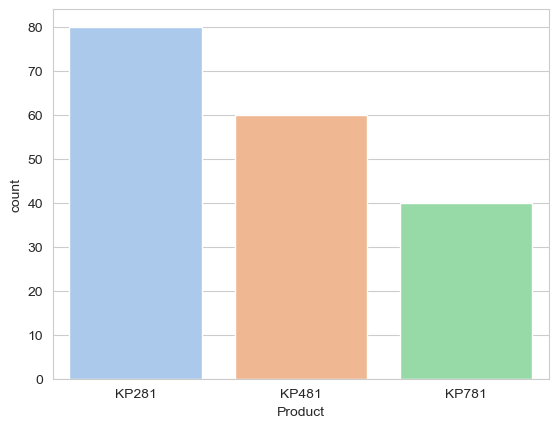

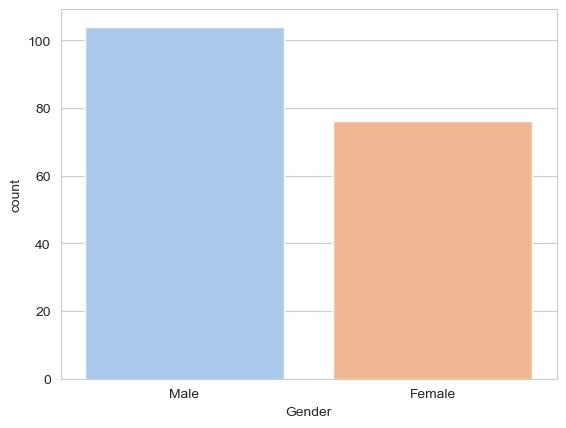

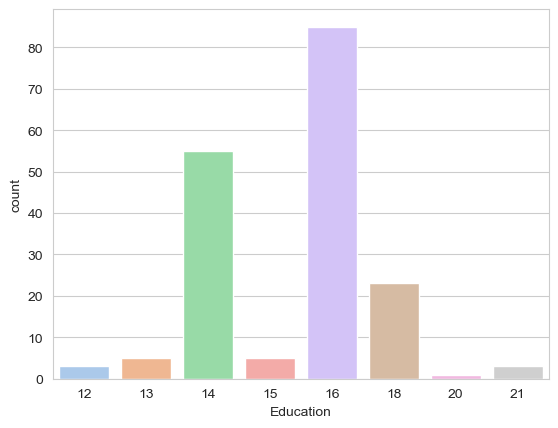

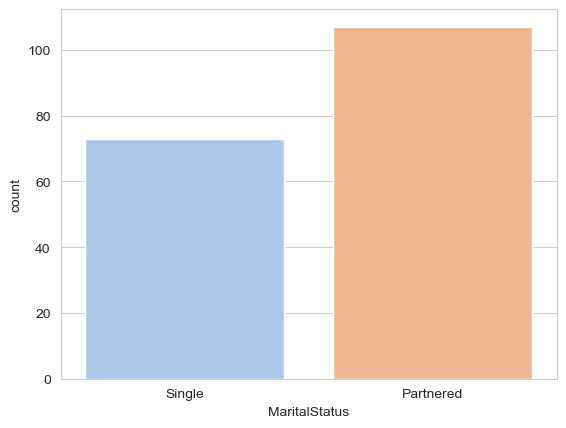

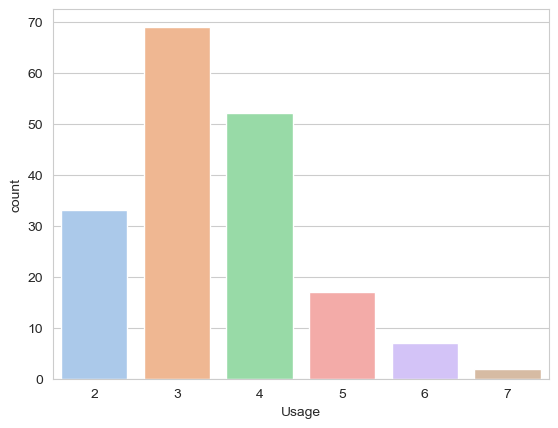

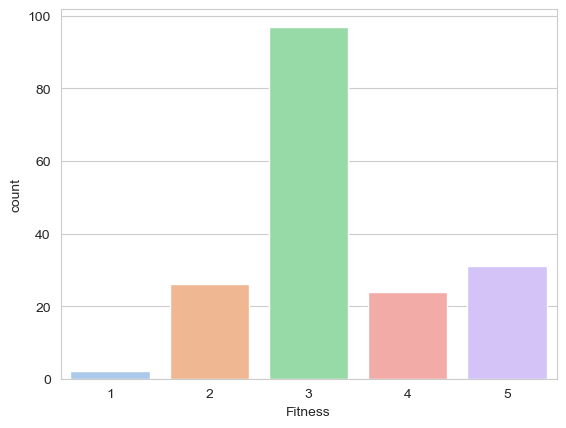

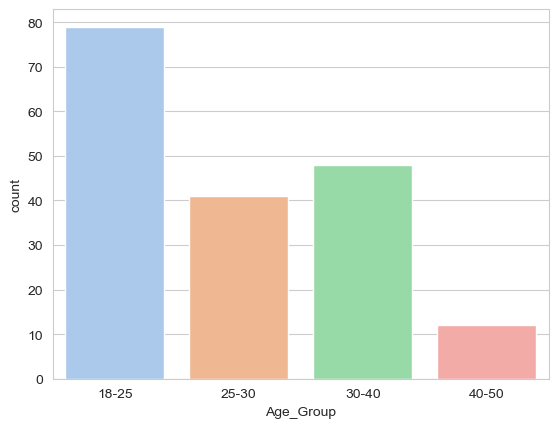

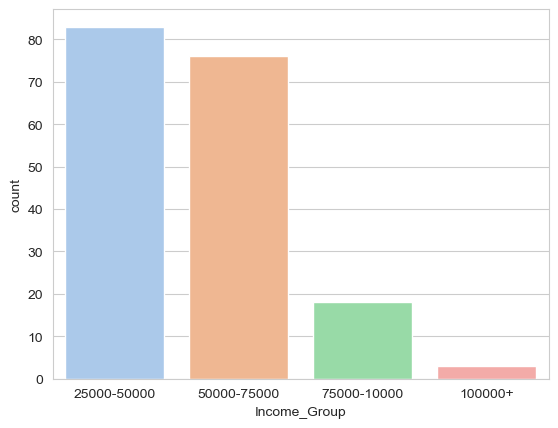

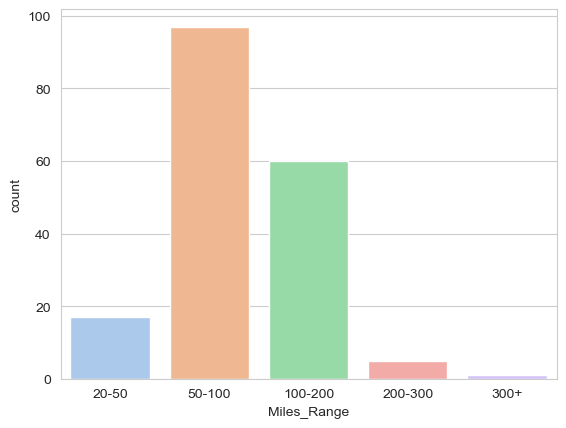

In [17]:
for i in df.columns:
    sns.countplot(data = df, x=i)
    plt.show()

## Bivariate Analysis

In [18]:
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,Age_Group,Income_Group,Miles_Range
0,KP281,Male,14,Single,3,4,18-25,25000-50000,100-200
1,KP281,Male,15,Single,2,3,18-25,25000-50000,50-100
2,KP281,Female,14,Partnered,4,3,18-25,25000-50000,50-100
3,KP281,Male,12,Single,3,3,18-25,25000-50000,50-100
4,KP281,Male,13,Partnered,4,2,18-25,25000-50000,20-50


<Axes: xlabel='Miles', ylabel='Income'>

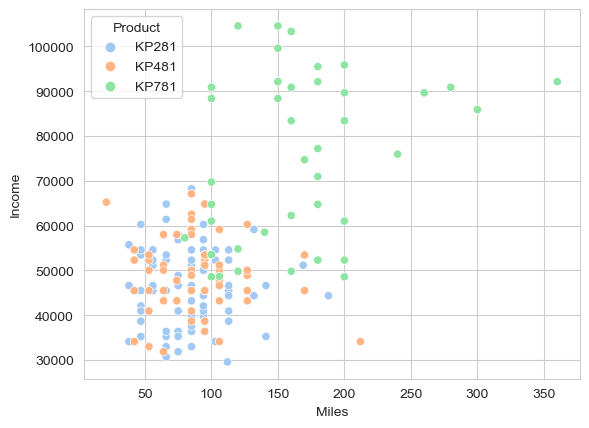

In [19]:
sns.scatterplot(data = df_aerofit, x ='Miles', y='Income', hue='Product')

<Axes: xlabel='Miles', ylabel='Education'>

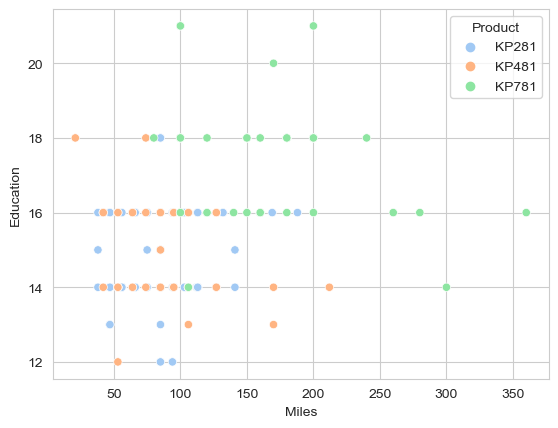

In [20]:
sns.scatterplot(data = df_aerofit, x ='Miles', y='Education', hue='Product')

<Axes: xlabel='Gender', ylabel='Usage'>

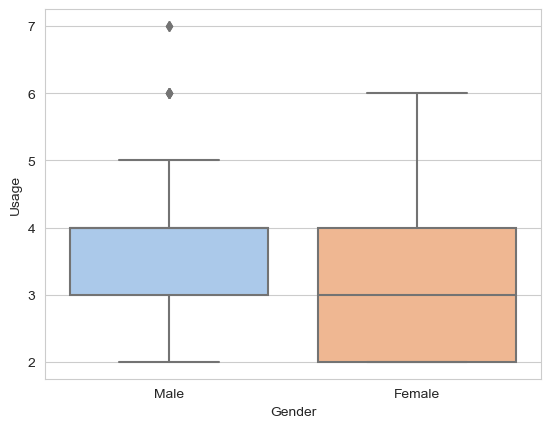

In [21]:
sns.boxplot(data = df, x ='Gender', y='Usage')

<Axes: xlabel='Education', ylabel='Income_Group'>

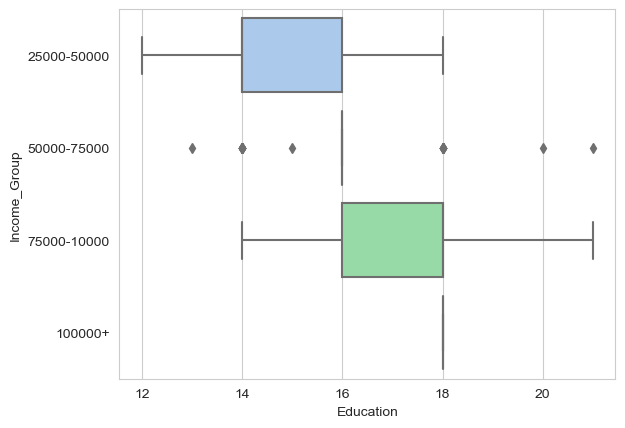

In [22]:
sns.boxplot(data = df, x ='Education', y='Income_Group')

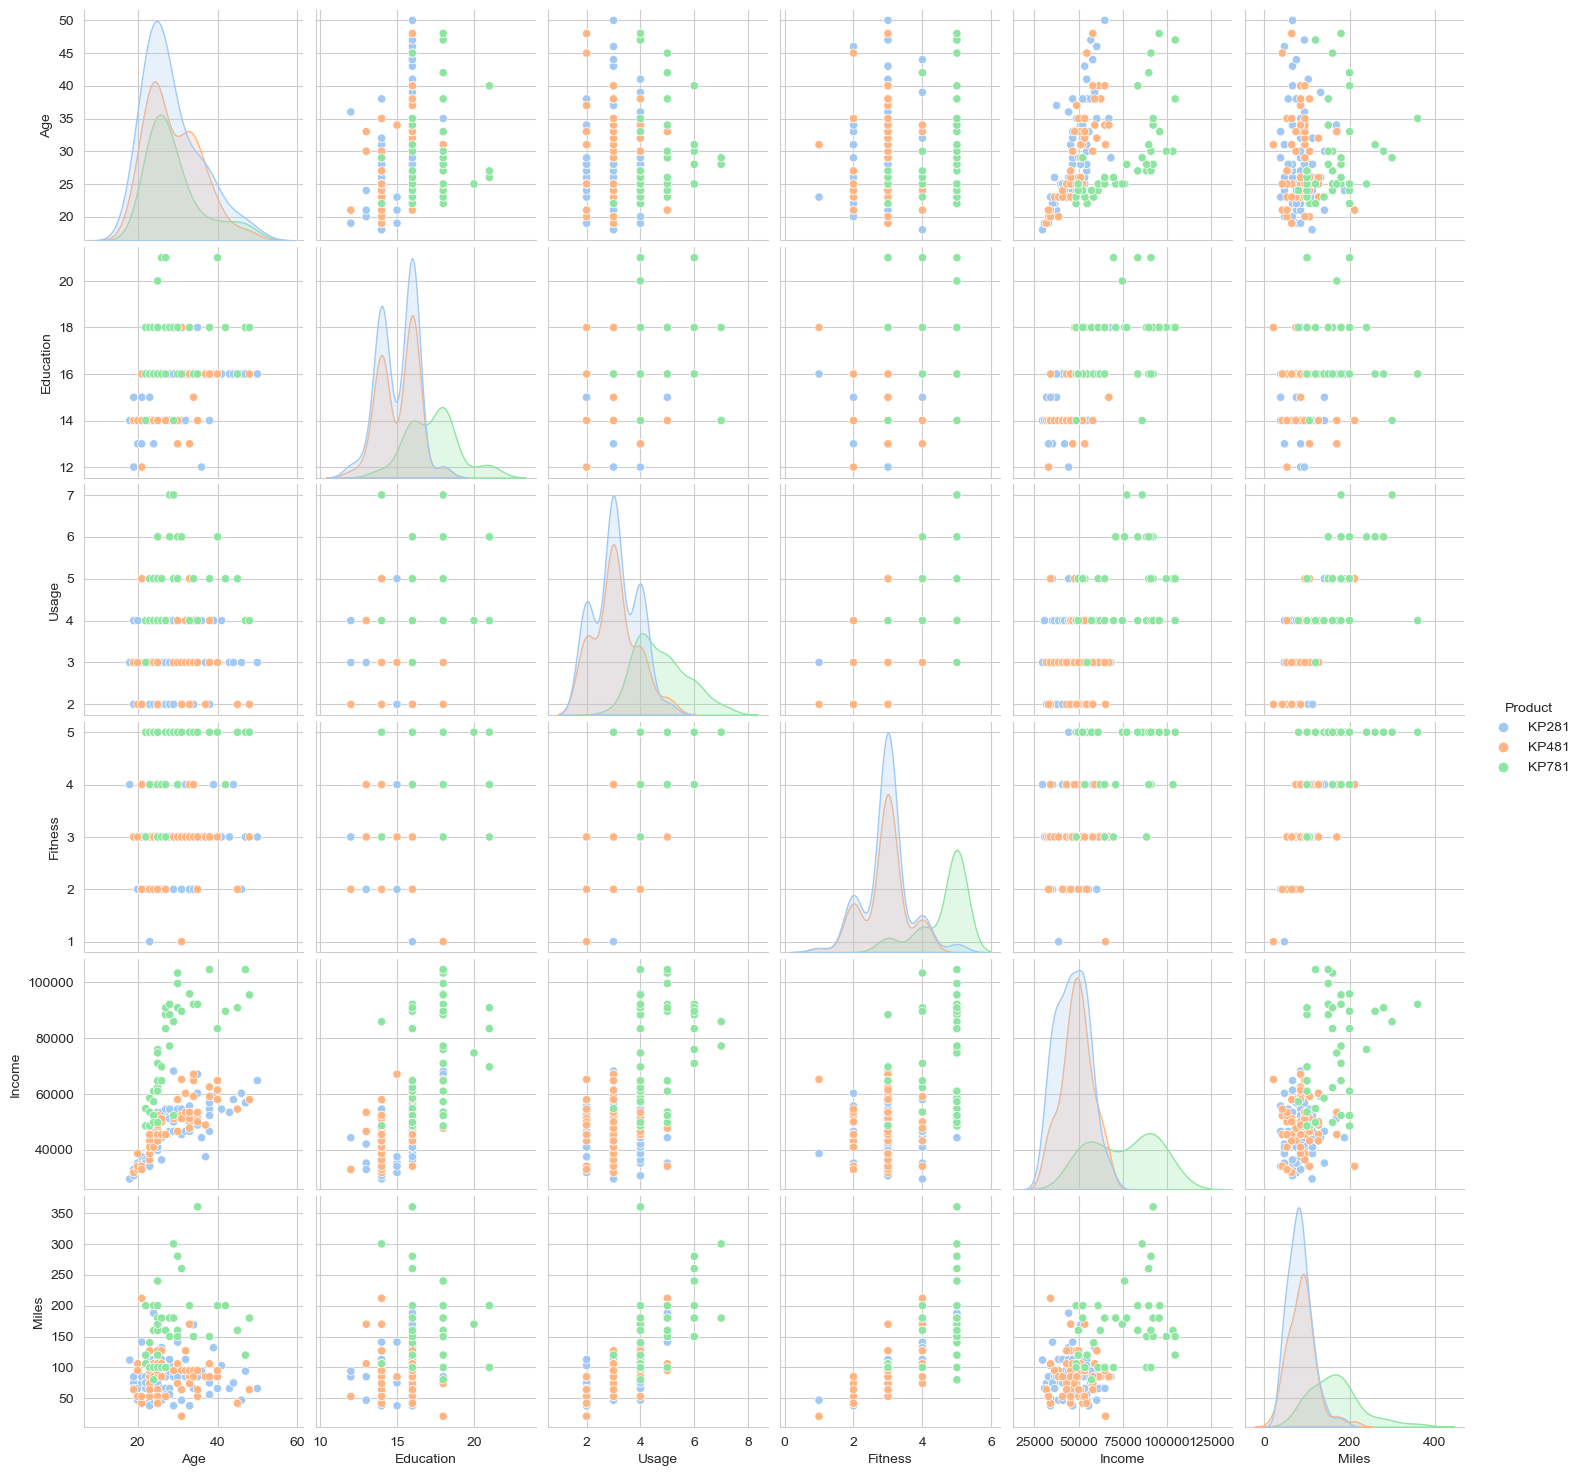

In [23]:
sns.pairplot(df_aerofit, hue='Product')

C:\Users\Ayush\AppData\Local\Temp\ipykernel_29660\2908868065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_aerofit.corr(), annot=True)


<Axes: >

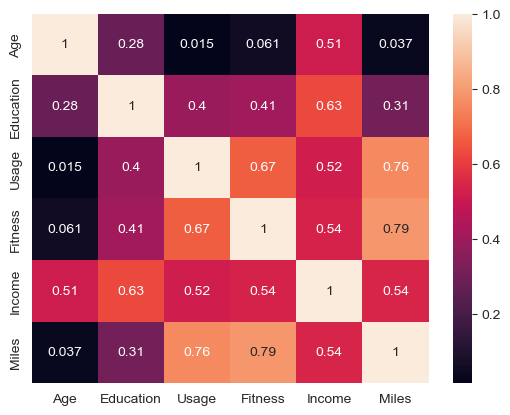

In [24]:
sns.heatmap(df_aerofit.corr(), annot=True)

# **Insights based on Marginal and Conditional Probabilities**

In [69]:
# function to get conditional probabilities based on features
def prob_index_given_column(index, column, data = df):
    df1 = pd.crosstab(df[index], df[column], margins=True, normalize='columns')
    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]):
            print(f"P({index} = '{df1.index[i]}'|{column} = '{df1.columns[j]}'): {df1.iloc[i, j]:.3f}")
        print()

We want to identify customer characteristics for the products

In [31]:
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,Age_Group,Income_Group,Miles_Range
0,KP281,Male,14,Single,3,4,18-25,25000-50000,100-200
1,KP281,Male,15,Single,2,3,18-25,25000-50000,50-100
2,KP281,Female,14,Partnered,4,3,18-25,25000-50000,50-100
3,KP281,Male,12,Single,3,3,18-25,25000-50000,50-100
4,KP281,Male,13,Partnered,4,2,18-25,25000-50000,20-50


## Product

In [35]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

`Observations`

1. We can see that the most sold product is KP281 and least sold is KP781
2. KP281 is the most basic and cheapest of given products, hence sold the most
3. KP781 is the most advanced and most expensive product hence lesser people prefer to buy it
4. KP481 is the intermediate product sold most next to KP281

## Gender

In [54]:
print('Gender given Product')
print('-'*50)
prob_index_given_column('Gender', 'Product')
print('Product given Gender')
print('-'*50)
prob_index_given_column('Product', 'Gender')

Gender given Product
--------------------------------------------------
P(Gender = 'Female'|Product = 'KP281'): 0.500
P(Gender = 'Female'|Product = 'KP481'): 0.483
P(Gender = 'Female'|Product = 'KP781'): 0.175
P(Gender = 'Female'|Product = 'All'): 0.422

P(Gender = 'Male'|Product = 'KP281'): 0.500
P(Gender = 'Male'|Product = 'KP481'): 0.517
P(Gender = 'Male'|Product = 'KP781'): 0.825
P(Gender = 'Male'|Product = 'All'): 0.578

Product given Gender
--------------------------------------------------
P(Product = 'KP281'|Gender = 'Female'): 0.526
P(Product = 'KP281'|Gender = 'Male'): 0.385
P(Product = 'KP281'|Gender = 'All'): 0.444

P(Product = 'KP481'|Gender = 'Female'): 0.382
P(Product = 'KP481'|Gender = 'Male'): 0.298
P(Product = 'KP481'|Gender = 'All'): 0.333

P(Product = 'KP781'|Gender = 'Female'): 0.092
P(Product = 'KP781'|Gender = 'Male'): 0.317
P(Product = 'KP781'|Gender = 'All'): 0.222



`Observations`

1. Overall approximately 58% of customers are Male and 42% of customers are female
2. *KP281* is bought equally by male and female customers
3. *KP481* is also bought almost equally by male and females with male customers being marginally higher
4. *KP781* is the product in which we observe vast difference in the genders who bought it with male customers accounting for 82% of the customers and female customers accounting for only 18%.
5. Among female customers *KP281* is preferred the most with 52% of total female customers buying it and *KP781* is bought the least with only 9.2% of female customers.
6. Among male customers all the products are bought almost equally with *KP281* being most bought and *KP481* being least bought.

## Education

In [55]:
print('Education given Product')
print('-'*50)
prob_index_given_column('Education', 'Product')
print('Product given Education')
print('-'*50)
prob_index_given_column('Product', 'Education')

Education given Product
--------------------------------------------------
P(Education = '12'|Product = 'KP281'): 0.025
P(Education = '12'|Product = 'KP481'): 0.017
P(Education = '12'|Product = 'KP781'): 0.000
P(Education = '12'|Product = 'All'): 0.017

P(Education = '13'|Product = 'KP281'): 0.037
P(Education = '13'|Product = 'KP481'): 0.033
P(Education = '13'|Product = 'KP781'): 0.000
P(Education = '13'|Product = 'All'): 0.028

P(Education = '14'|Product = 'KP281'): 0.375
P(Education = '14'|Product = 'KP481'): 0.383
P(Education = '14'|Product = 'KP781'): 0.050
P(Education = '14'|Product = 'All'): 0.306

P(Education = '15'|Product = 'KP281'): 0.050
P(Education = '15'|Product = 'KP481'): 0.017
P(Education = '15'|Product = 'KP781'): 0.000
P(Education = '15'|Product = 'All'): 0.028

P(Education = '16'|Product = 'KP281'): 0.487
P(Education = '16'|Product = 'KP481'): 0.517
P(Education = '16'|Product = 'KP781'): 0.375
P(Education = '16'|Product = 'All'): 0.472

P(Education = '18'|Product = '

`Observations`

1. People with 16 or less years of education mostly buy *KP281* or *KP481*
2. People with 16 or more years of education mostly buy *KP781* with people having >=20yrs of education buying only *KP781*
3. High Education level seems to be the indicator for buying advanced and expensive products

## Marital Status

In [60]:
print('MaritalStatus given Product')
print('-'*50)
prob_index_given_column('MaritalStatus', 'Product')
print('Product given MaritalStatus')
print('-'*50)
prob_index_given_column('Product', 'MaritalStatus')

MaritalStatus given Product
--------------------------------------------------
P(MaritalStatus = 'Partnered'|Product = 'KP281'): 0.600
P(MaritalStatus = 'Partnered'|Product = 'KP481'): 0.600
P(MaritalStatus = 'Partnered'|Product = 'KP781'): 0.575
P(MaritalStatus = 'Partnered'|Product = 'All'): 0.594

P(MaritalStatus = 'Single'|Product = 'KP281'): 0.400
P(MaritalStatus = 'Single'|Product = 'KP481'): 0.400
P(MaritalStatus = 'Single'|Product = 'KP781'): 0.425
P(MaritalStatus = 'Single'|Product = 'All'): 0.406

Product given MaritalStatus
--------------------------------------------------
P(Product = 'KP281'|MaritalStatus = 'Partnered'): 0.449
P(Product = 'KP281'|MaritalStatus = 'Single'): 0.438
P(Product = 'KP281'|MaritalStatus = 'All'): 0.444

P(Product = 'KP481'|MaritalStatus = 'Partnered'): 0.336
P(Product = 'KP481'|MaritalStatus = 'Single'): 0.329
P(Product = 'KP481'|MaritalStatus = 'All'): 0.333

P(Product = 'KP781'|MaritalStatus = 'Partnered'): 0.215
P(Product = 'KP781'|MaritalStatu

`Observations`

1. For products *KP281* and *KP481* 60% of the people were Partnered and 40% were single. *KP781* had similar distribution with ~57% Partnered and ~43% single.
2. Overall ~60% customers were partnered and ~40% were single which means that Married people are more likely to buy these products.
3. Among Partnered people, *KP281* was preferred most at ~45%, then *KP481* was preferred at ~33%, then *KP781* was preferred at ~22%. These numbers were quite similar for single customers.

## Usage

In [62]:
print('Usage given Product')
print('-'*50)
prob_index_given_column('Usage', 'Product')
print('Product given Usage')
print('-'*50)
prob_index_given_column('Product', 'Usage')

Usage given Product
--------------------------------------------------
P(Usage = '2'|Product = 'KP281'): 0.237
P(Usage = '2'|Product = 'KP481'): 0.233
P(Usage = '2'|Product = 'KP781'): 0.000
P(Usage = '2'|Product = 'All'): 0.183

P(Usage = '3'|Product = 'KP281'): 0.463
P(Usage = '3'|Product = 'KP481'): 0.517
P(Usage = '3'|Product = 'KP781'): 0.025
P(Usage = '3'|Product = 'All'): 0.383

P(Usage = '4'|Product = 'KP281'): 0.275
P(Usage = '4'|Product = 'KP481'): 0.200
P(Usage = '4'|Product = 'KP781'): 0.450
P(Usage = '4'|Product = 'All'): 0.289

P(Usage = '5'|Product = 'KP281'): 0.025
P(Usage = '5'|Product = 'KP481'): 0.050
P(Usage = '5'|Product = 'KP781'): 0.300
P(Usage = '5'|Product = 'All'): 0.094

P(Usage = '6'|Product = 'KP281'): 0.000
P(Usage = '6'|Product = 'KP481'): 0.000
P(Usage = '6'|Product = 'KP781'): 0.175
P(Usage = '6'|Product = 'All'): 0.039

P(Usage = '7'|Product = 'KP281'): 0.000
P(Usage = '7'|Product = 'KP481'): 0.000
P(Usage = '7'|Product = 'KP781'): 0.050
P(Usage = '7'|

`Observations`

1. People with usage <= 4 times a week are most likely to buy either *KP281* or *KP481*.
2. People with usage >=4 times a week are most likely to buy *KP781*
3. People who reported their usage >= 6 times a week are most certain to buy *KP781*
4. People who reported their usage <= 3 times a week are almost certain to never buy *KP781*
5. People most likely to buy *KP481* use the product <= 4 time a week.

## Fitness

In [64]:
print('Fitness given Product')
print('-'*50)
prob_index_given_column('Fitness', 'Product')
print('Product given Fitness')
print('-'*50)
prob_index_given_column('Product', 'Fitness')

Fitness given Product
--------------------------------------------------
P(Fitness = '1'|Product = 'KP281'): 0.013
P(Fitness = '1'|Product = 'KP481'): 0.017
P(Fitness = '1'|Product = 'KP781'): 0.000
P(Fitness = '1'|Product = 'All'): 0.011

P(Fitness = '2'|Product = 'KP281'): 0.175
P(Fitness = '2'|Product = 'KP481'): 0.200
P(Fitness = '2'|Product = 'KP781'): 0.000
P(Fitness = '2'|Product = 'All'): 0.144

P(Fitness = '3'|Product = 'KP281'): 0.675
P(Fitness = '3'|Product = 'KP481'): 0.650
P(Fitness = '3'|Product = 'KP781'): 0.100
P(Fitness = '3'|Product = 'All'): 0.539

P(Fitness = '4'|Product = 'KP281'): 0.113
P(Fitness = '4'|Product = 'KP481'): 0.133
P(Fitness = '4'|Product = 'KP781'): 0.175
P(Fitness = '4'|Product = 'All'): 0.133

P(Fitness = '5'|Product = 'KP281'): 0.025
P(Fitness = '5'|Product = 'KP481'): 0.000
P(Fitness = '5'|Product = 'KP781'): 0.725
P(Fitness = '5'|Product = 'All'): 0.172

Product given Fitness
--------------------------------------------------
P(Product = 'KP281'

`Observations`

1. Among people who rated their fitness level as '5' 93.5 % people bought *KP781*. 
2. Among people who bought *KP781*, 72.5% people rated their fitness level as '5'. We can say that fitness levels directly relate to buying advanced products.
3. People who rated their fitness level '<3' mostly bought *KP281* or *KP481*
4. Of the people who rated their fitness levels as 1,2 or 3 ~50% bought *KP281* and ~50% bought *KP481*

Index(['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness',
       'Age_Group', 'Income_Group', 'Miles_Range'],
      dtype='object')

## Age Group

In [66]:
print('Age_Group given Product')
print('-'*50)
prob_index_given_column('Age_Group', 'Product')
print('Product given Age_Group')
print('-'*50)
prob_index_given_column('Product', 'Age_Group')

Age_Group given Product
--------------------------------------------------
P(Age_Group = '18-25'|Product = 'KP281'): 0.425
P(Age_Group = '18-25'|Product = 'KP481'): 0.467
P(Age_Group = '18-25'|Product = 'KP781'): 0.425
P(Age_Group = '18-25'|Product = 'All'): 0.439

P(Age_Group = '25-30'|Product = 'KP281'): 0.263
P(Age_Group = '25-30'|Product = 'KP481'): 0.117
P(Age_Group = '25-30'|Product = 'KP781'): 0.325
P(Age_Group = '25-30'|Product = 'All'): 0.228

P(Age_Group = '30-40'|Product = 'KP281'): 0.237
P(Age_Group = '30-40'|Product = 'KP481'): 0.383
P(Age_Group = '30-40'|Product = 'KP781'): 0.150
P(Age_Group = '30-40'|Product = 'All'): 0.267

P(Age_Group = '40-50'|Product = 'KP281'): 0.075
P(Age_Group = '40-50'|Product = 'KP481'): 0.033
P(Age_Group = '40-50'|Product = 'KP781'): 0.100
P(Age_Group = '40-50'|Product = 'All'): 0.067

Product given Age_Group
--------------------------------------------------
P(Product = 'KP281'|Age_Group = '18-25'): 0.430
P(Product = 'KP281'|Age_Group = '25-30

`Observations`

1. Majority of the customers are in the age group - '18-25'. Poeple in this age group are most likely to buy *KP281* and *KP481* and least likely to buy *KP781*
2. Among all age groups '18-25' is still the most likely to buy *KP781*
3. People in age group 40-50 preferred *KP281* the most at 50%, then *KP781* at 33%, then *KP481* at 17%
3. People in age group 25-30 are most likely to buy *KP281*

## Income Group

In [67]:
print('Income_Group given Product')
print('-'*50)
prob_index_given_column('Income_Group', 'Product')
print('Product given Income_Group')
print('-'*50)
prob_index_given_column('Product', 'Income_Group')

Income_Group given Product
--------------------------------------------------
P(Income_Group = '25000-50000'|Product = 'KP281'): 0.600
P(Income_Group = '25000-50000'|Product = 'KP481'): 0.500
P(Income_Group = '25000-50000'|Product = 'KP781'): 0.125
P(Income_Group = '25000-50000'|Product = 'All'): 0.461

P(Income_Group = '50000-75000'|Product = 'KP281'): 0.400
P(Income_Group = '50000-75000'|Product = 'KP481'): 0.500
P(Income_Group = '50000-75000'|Product = 'KP781'): 0.350
P(Income_Group = '50000-75000'|Product = 'All'): 0.422

P(Income_Group = '75000-10000'|Product = 'KP281'): 0.000
P(Income_Group = '75000-10000'|Product = 'KP481'): 0.000
P(Income_Group = '75000-10000'|Product = 'KP781'): 0.450
P(Income_Group = '75000-10000'|Product = 'All'): 0.100

P(Income_Group = '100000+'|Product = 'KP281'): 0.000
P(Income_Group = '100000+'|Product = 'KP481'): 0.000
P(Income_Group = '100000+'|Product = 'KP781'): 0.075
P(Income_Group = '100000+'|Product = 'All'): 0.017

Product given Income_Group
---

`Observations`

1. Among people with income <50000, *KP281* is most popular and most liekly to be bought by this group.
2. People with income > 75000 have never bought *KP281* or *KP481*, they only buy *KP781*
3. *KP481* is equally likely to be bought by group 25000-50000 and 50000-75000.


## Miles Range

In [68]:
print('Miles_Range given Product')
print('-'*50)
prob_index_given_column('Miles_Range', 'Product')
print('Product given Miles_Range')
print('-'*50)
prob_index_given_column('Product', 'Miles_Range')

Miles_Range given Product
--------------------------------------------------
P(Miles_Range = '20-50'|Product = 'KP281'): 0.150
P(Miles_Range = '20-50'|Product = 'KP481'): 0.083
P(Miles_Range = '20-50'|Product = 'KP781'): 0.000
P(Miles_Range = '20-50'|Product = 'All'): 0.094

P(Miles_Range = '50-100'|Product = 'KP281'): 0.625
P(Miles_Range = '50-100'|Product = 'KP481'): 0.650
P(Miles_Range = '50-100'|Product = 'KP781'): 0.200
P(Miles_Range = '50-100'|Product = 'All'): 0.539

P(Miles_Range = '100-200'|Product = 'KP281'): 0.225
P(Miles_Range = '100-200'|Product = 'KP481'): 0.250
P(Miles_Range = '100-200'|Product = 'KP781'): 0.675
P(Miles_Range = '100-200'|Product = 'All'): 0.333

P(Miles_Range = '200-300'|Product = 'KP281'): 0.000
P(Miles_Range = '200-300'|Product = 'KP481'): 0.017
P(Miles_Range = '200-300'|Product = 'KP781'): 0.100
P(Miles_Range = '200-300'|Product = 'All'): 0.028

P(Miles_Range = '300+'|Product = 'KP281'): 0.000
P(Miles_Range = '300+'|Product = 'KP481'): 0.000
P(Miles_R

`Observations`

1. People who ran more than 300 miles bought only *KP781*
2. People who ran more than 200 miles never bought *KP281*
3. People who ran 200-300 miles bought *KP781* 80% of the time and *KP481* 20% of the time and never bought *KP281*
4. Among people who ran 100-200 miles, KP481 is likely to be bought 25% times and KP281 is likely to be bought 30% times and KP781 is likely to be bought 45* of the times.

# **Recommendations**

1. In *KP781* segment there is potential to attract more female customers. We have seen that higher income, higher usage and people who ran more miles is positively related to buying *KP781*. Females who match this criteria can be advertised this product.
2. Two new product tiers can be introduced *KP381* and *KP581*
 >   - KP381 will be below KP481 in terms of price and features
 >   - KP581 will be below KP781 in terms of price and features
    - These new tier of products can be used to cross sell between various income groups depending on whether they want to spend more or less
    - It will also give customers more options to buy matching their needs thus increasing overall revenue.
3. People with >16 years of education bought top tier product but overall numbers were low, people with higher years of education can be advertised with top-tier products
4. A mid income person who is male with high fitness rating tends to buy top tier KP781. A female customer with similar characteristics tends to buy mid tier KP481. This presents a huge potential opportunity to upsell KP781 to female customers with matching characteristics as they'll most likely buy the product.
5. People who ran between 100-300 miles used mostly *KP481*, they are likely to buy *KP781* given the distance covered by them.